In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'  ###配置可以保存为矢量图
import os
import numpy as np
from numpy.linalg import cholesky
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy as sp 
from sklearn import datasets

# 3.1 Data-Separate 2 Gaussians

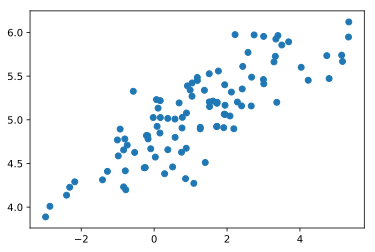

In [2]:
sample_size= 100
dim=2
##########try
mu = np.array([[1, 5]]) #mean matrix
#sigma = np.array([[1, 0.5], [1.5, 3]]) #convariance matrix
sigma = np.array([[1, 0.5], [1.5, 2.5]])
R =  np.linalg.cholesky(sigma) # Cholesky decomposition to positive definite matrix,return lower triangular matrix
np.random.seed(0)
x = np.dot(np.random.randn(sample_size, dim), R) + mu
# plt.plot(x[:,0],x[:,1],'+')
plt.scatter(x[:,0],x[:,1])
##########try

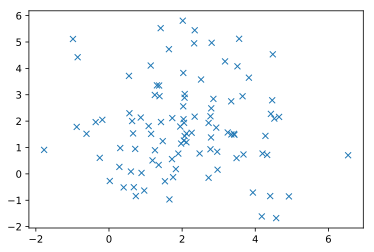

In [50]:
'''
这是一开始取的mean和cov
mean=(1,2)  
cov=[[1,0],[0,3]]
'''
mean=(2,2)  #tuple
cov=[[3,0],[0,3]]
x, y = np.random.multivariate_normal(mean, cov, sample_size).T
plt.plot(x, y, 'x')

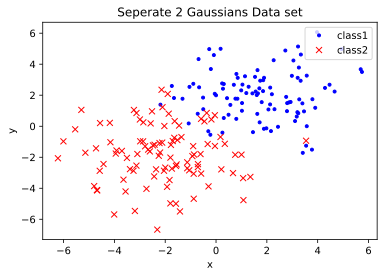

In [198]:
samples=np.random.multivariate_normal(mean, cov, sample_size)

plt.plot(samples[:, 0], samples[:, 1], '.',c='b',label='class1')
'''
这是一开始取的mean2,cov2
mean2=(5,8)
cov2=[[1,0],[0,7]]
'''
# mean2=(-1,-1)
mean2=(-2,-2)
cov2=[[3,0],[0,3]]
samples2=np.random.multivariate_normal(mean2, cov2, sample_size)
plt.plot(samples2[:, 0], samples2[:, 1], 'x',c='r',label='class2')
plt.title("Seperate 2 Gaussians Data set")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.savefig('2_Gau.pdf', bbox_inches='tight')
plt.show()

## 3.1.a Histograms of ya and yb

In [5]:
def func(w, x):
    return np.dot(w,x)   # w*x

In [6]:
w1=np.atleast_2d([-.6,.5]) #1*2
print(w1.shape)
print(w1)
w2=np.atleast_2d([1.5,1.5])
w3=np.atleast_2d([-3,.5])
w4=np.atleast_2d([3,-.5])
w5=np.atleast_2d([-5,-.5])
W=np.concatenate((w1, w2, w3,w4,w5), axis=0)
print(W.shape)
print(W)
print(W[0,:]) #第一行

(1, 2)
[[-0.6  0.5]]
(5, 2)
[[-0.6  0.5]
 [ 1.5  1.5]
 [-3.   0.5]
 [ 3.  -0.5]
 [-5.  -0.5]]
[-0.6  0.5]


In [7]:
print(samples.shape)
x1=np.array([samples[:, 0], samples[:, 1]]) #取第一列和第二列构成一个数组2*n
print(x1.shape)
# print(x1)

(100, 2)
(2, 100)


In [8]:
x2=np.array([samples2[:, 0], samples2[:, 1]]) #2*n
print(x2.shape)
# print(x2)

(2, 100)


In [9]:
import itertools
from itertools import chain
y1=func(w1,x1) #1*n
print(y1.shape)
# print(y1)
# y1w=np.dot(w1,x1)
# print(y1w)
y2=func(w1,x2)
y11=list(chain(*y1)) #2维数组转成1维数组
y21=y2.flatten()
print(y21.shape)
# print(y11)
# print(y21)

(1, 100)
(100,)


(100,)


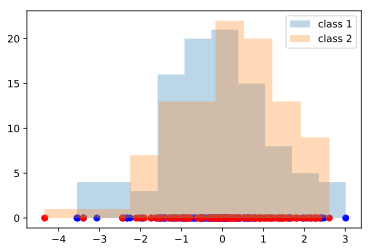

In [10]:
y1=func(W[0,:],x1)
print(y1.shape)
# print(y1)
y2=func(W[0,:],x2)

import math
# y11=y1.flatten()
# print(y11.shape)
# print(y11)

# y11=list(np.ravel(y1))

#import itertools
#y11=list(itertools.chain.from_iterable(y1))

#y11=np.array(y1).ravel().tolist()

# from itertools import chain
# y11 = list(chain.from_iterable(y1))

# y11=list(chain(*y1))
y11=y1
# y1.shape
plt.scatter(y11,np.zeros(sample_size),c='b')
# y21=y2.flatten()
y21=y2
plt.scatter(y21,np.zeros(sample_size),c='r')
bins = np.linspace(math.ceil(min(y21)),
                   math.floor(max(y21)),
                   20) # fixed number of bins
plt.hist(y11,alpha=0.3,label='class 1')  #bins=bins,
plt.hist(y21,alpha=0.3,label='class 2')
plt.legend(loc='upper right')
plt.show()

In [11]:
y1=func(W[1,:],x1)
print(y1.shape)
# print(y1)
y2=func(W[1,:],x2)

(100,)


(100,)


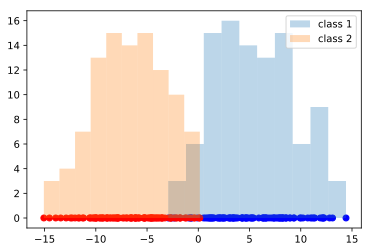

In [12]:
y1=func(W[1,:],x1)
print(y1.shape)
# print(y1)
y2=func(W[1,:],x2)
y11=y1
plt.scatter(y11,np.zeros(sample_size),c='b')
y21=y2.flatten()
plt.scatter(y21,np.zeros(sample_size),c='r')
bins = np.linspace(math.ceil(min(y21)),
                   math.floor(max(y21)),
                   20) # fixed number of bins
plt.hist(y11,alpha=0.3,label='class 1')
plt.hist(y21,alpha=0.3,label='class 2')
plt.legend(loc='upper right')
plt.show()

(100,)


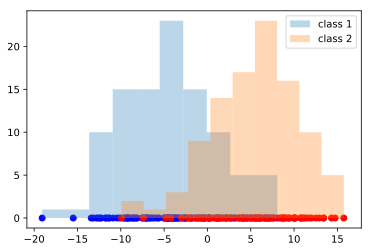

In [13]:
y1=func(W[2,:],x1)
print(y1.shape)
# print(y1)
y2=func(W[2,:],x2)
y11=y1
plt.scatter(y11,np.zeros(sample_size),c='b')
y21=y2.flatten()
plt.scatter(y21,np.zeros(sample_size),c='r')
bins = np.linspace(math.ceil(min(y21)),
                   math.floor(max(y21)),
                   20) # fixed number of bins
plt.hist(y11,alpha=0.3,label='class 1')
plt.hist(y21,alpha=0.3,label='class 2')
plt.legend(loc='upper right')
plt.show()

(100,)


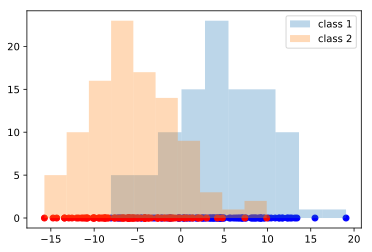

In [14]:
y1=func(W[3,:],x1)
print(y1.shape)
# print(y1)
y2=func(W[3,:],x2)
y11=y1
plt.scatter(y11,np.zeros(sample_size),c='b')
y21=y2.flatten()
plt.scatter(y21,np.zeros(sample_size),c='r')
bins = np.linspace(math.ceil(min(y21)),
                   math.floor(max(y21)),
                   20) # fixed number of bins
plt.hist(y11,alpha=0.3,label='class 1')
plt.hist(y21,alpha=0.3,label='class 2')
plt.legend(loc='upper right')
plt.show()

(100,)


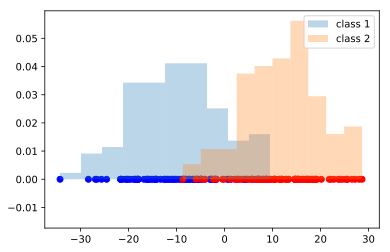

In [15]:
y1=func(W[4,:],x1)
print(y1.shape)
# print(y1)
y2=func(W[4,:],x2)
y11=y1
plt.scatter(y11,np.zeros(sample_size),c='b')
y21=y2.flatten()
plt.scatter(y21,np.zeros(sample_size),c='r')
bins = np.linspace(math.ceil(min(y11)),
                   math.floor(max(y21)),
                   20) # fixed number of bins
plt.hist(y11,density=1,alpha=0.3,label='class 1') #bins=bins
plt.hist(y21,density=1,alpha=0.3,label='class 2')
plt.legend(loc='upper right')
plt.show()

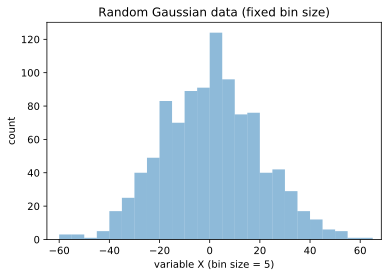

In [16]:
# try
data = np.random.normal(0, 20, 1000)
 
bins = np.arange(-100, 100, 5) # fixed bin size
 
plt.xlim([min(data)-5, max(data)+5])
 
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')
 
plt.show()

## 3.1.b Plot the dependence of F(w)

In [17]:
theta=np.pi/180*170
print(theta)

Rtheta = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
print(Rtheta) #2*2

Wtheta=w2.dot(Rtheta) #1*2
print(Wtheta)

def fisher_ratio_func(x1,x2,wtheta):
    y1= func(wtheta,x1) 
    y2=func(wtheta,x2)
    mu1=np.mean(y1)
#     print(mu1)
    mu2=np.mean(y2)
    var1=np.var(y1)
#     print(std1)
    var2=np.var(y2)
#     print(std2)
    fw_numerator=np.power(mu1-mu2,2)
#     print(fw_numerator)
    fw_denominator=y1.size/(y1.size+y2.size)*var1+y2.size/(y1.size+y2.size)*var2
#     print(fw_denominator)
    fw=fw_numerator/fw_denominator
    return fw
#################计算每个w对应的fisher ratio##########################
fw1=fisher_ratio_func(x1,x2,w1)
print("fw1=",fw1)
fw2=fisher_ratio_func(x1,x2,w2)
print("fw2=",fw2)
fw3=fisher_ratio_func(x1,x2,w3)
print("fw3=",fw3)
fw4=fisher_ratio_func(x1,x2,w4)
print("fw4=",fw4)
fw5=fisher_ratio_func(x1,x2,w5)
print("fw5=",fw5)

2.9670597283903604
[[-0.98480775 -0.17364818]
 [ 0.17364818 -0.98480775]]
[[-1.21673936 -1.7376839 ]]
fw1= 0.06742044053937457
fw2= 10.41649169171962
fw3= 3.712894233634513
fw4= 3.712894233634513
fw5= 6.560615157685998


32
w1= [[-0.6  0.5]]
fw= 10.414647749014472
theta_max= 4.8
Wtheta= [[-0.55058181 -0.55394919]]
(1, 2)


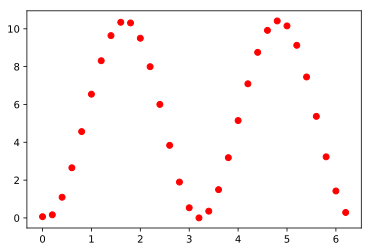

In [18]:
# w旋转一周找到的F(w)最大值对应的w
theta_array=np.arange(0,2*np.pi,0.2,dtype='float32')
print(theta_array.size)

def fun_rotate(w,theta):
    Rtheta = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    Wtheta=w.dot(Rtheta)  
    return Wtheta


def fun_fwplot(w):
    fw_array=[]
    for theta in theta_array:
        Rtheta = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
        Wtheta=w1.dot(Rtheta)   #1*2
        Wtheta=fun_rotate(w,theta) #1*2
        fw=fisher_ratio_func(x1,x2,Wtheta)
        fw_array.append(fw)
    # print(theta_array)
    # print(fw_array)
    # print(6/np.pi*180)
    # print(6-np.pi)
    print("fw=",np.max(fw_array))
    max_index=np.argmax(fw_array)
    theta_max=theta_array[max_index]
    print("theta_max=",theta_max)
    Wtheta=fun_rotate(w,theta_max)
    print("Wtheta=",Wtheta)
    print(Wtheta.shape)
    plt.scatter(theta_array,fw_array,c='r')
    plt.show()
    
print("w1=",w1)
fun_fwplot(w1)

w2= [[1.5 1.5]]
fw= 10.41715741288416
theta_max= 3.2
Wtheta= [[-1.58500344 -1.40988087]]
(1, 2)


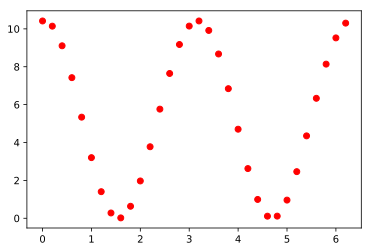

In [19]:
print("w2=",w2)
fun_fwplot(w2)

w3= [[-3.   0.5]]
fw= 10.420874864430415
theta_max= 2.2
Wtheta= [[2.16975164 2.13123849]]
(1, 2)


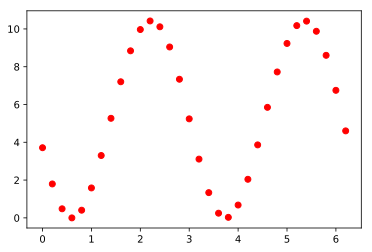

In [20]:
print("w3=",w3)
fun_fwplot(w3)

w4= [[ 3.  -0.5]]
fw= 10.420874864430415
theta_max= 2.2
Wtheta= [[-2.16975164 -2.13123849]]
(1, 2)


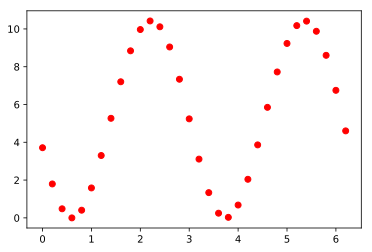

In [21]:
print("w4=",w4)
fun_fwplot(w4)

w5= [[-5.  -0.5]]
fw= 10.417893837540314
theta_max= 5.6
Wtheta= [[-3.56219566 -3.54411647]]
(1, 2)


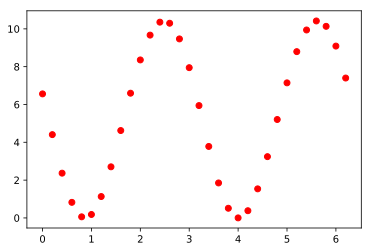

In [22]:
print("w5=",w5)
fun_fwplot(w5)

(2,)
(100,)


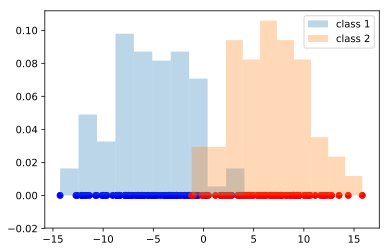

In [23]:
# 第五组w旋转一周找到的F(w)最大值对应的w,再画投影图(可以和原图比较)
print(W[4,:].shape)
y1=func(Wtheta.flatten(),x1)
print(y1.shape)
# print(y1)
y2=func(Wtheta.flatten(),x2)
y11=y1
plt.scatter(y11,np.zeros(sample_size),c='b')
y21=y2.flatten()
plt.scatter(y21,np.zeros(sample_size),c='r')
bins = np.linspace(math.ceil(min(y11)),
                   math.floor(max(y21)),
                   20) # fixed number of bins
plt.hist(y11,density=1,alpha=0.3,label='class 1') #bins=bins
plt.hist(y21,density=1,alpha=0.3,label='class 2')
plt.legend(loc='upper right')
plt.show()

## 3.2.a (1)Plot the equi-probable contour lines for each class

In [24]:
'''
二维高斯分布的概率密度函数（pdf）
'''
def gaussian(x,mean,cov):    
    dim = np.shape(cov)[0] #维度
    #加单位矩阵是为了防止行列式为0的情况
    covdet = np.linalg.det(cov+np.eye(dim)*0.01) #协方差矩阵的行列式
    covinv = np.linalg.inv(cov+np.eye(dim)*0.01) #协方差矩阵的逆
    xdiff = x - mean
    #概率密度
    prob_numerato = 1.0/np.power(2*np.pi,1.0*2/2)/np.sqrt(np.abs(covdet))
    prob_denominator=np.exp(-1.0/2*np.dot(np.dot(xdiff.T,covinv),xdiff)) #有转置
    prob=prob_numerato*prob_denominator
    
    return prob

(200, 200)


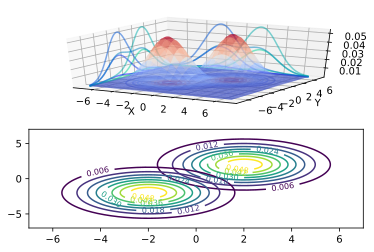

In [35]:
import matplotlib as mpl
from matplotlib import cm
# mean=np.array([2,2])
# mean2=np.array([-2,-2])
# cov=3*np.array([[1, 0],
#               [0, 1]])
'''
mean=(2,2)
cov=[[3,0],[0,3]]
mean2=(-2,-2)
cov2=[[1,0],[0,7]]
'''
###两个分布均值不对称，也找不到比如(2,2)和(-1,-1)；(2,2)和(-2,-2)这种均值分布能找到
###两个分布cov不一样，找不到

# x,y = np.random.multivariate_normal(mean,cov,500).T
# cov = np.cov(x,y) #由真实数据计算得到的协方差矩阵，而不是自己任意设定
n=200
# mins=-2  
# maxs=14
mins=-7 
maxs=7
x = np.linspace(mins,maxs,n) #200
y = np.linspace(mins,maxs,n) #200
xx,yy = np.meshgrid(x, y) ##生成网格数据, xx和yy各是200*200
print(xx.shape)
zz1 = np.zeros((n,n))
zz2 = np.zeros((n,n))
setsx=[]
setsy=[]
for i in range(n):
    for j in range(n):
        zz1[i][j] = gaussian(np.array([xx[i][j],yy[i][j]]),mean,cov)  
        zz2[i][j] = gaussian(np.array([xx[i][j],yy[i][j]]),mean2,cov) ###cov2,决定了两个类的协方差矩阵(Sa,Sb)是否相等
#         if(zz1[i][j]==zz2[i][j]):
#             setsx.append(xx[i][j])
#             setsy.append(yy[i][j])
# print(len(setsx))
# print(len(setsy))
zz=zz1+zz2
fig=plt.figure()
ax = fig.add_subplot(211,projection='3d') 

# ax.plot_surface(xx, yy, zz, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm) ###绘制曲面，指定行和列的步幅，步幅决定曲面上“瓦片”的大小
ax.plot_surface(xx, yy, zz1, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm) 
ax.plot_surface(xx, yy, zz2, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm) 

cset = ax.contour(xx,yy,zz,10,zdir='z',offset=0,cmap=cm.coolwarm, alpha=0.5) #10表示按照高度分成10层，cmap表示渐变标准
#offset表示投影位置，offset=0表示投影在XOY平面
cset = ax.contour(xx, yy, zz, zdir='x', offset=mins,cmap=mpl.cm.winter, alpha=0.5)
#投影在YOZ平面上，左面那个平面上
cset = ax.contour(xx, yy, zz, zdir='y', offset= maxs,cmap= mpl.cm.winter,alpha=0.5)
# 投影在XOZ平面上，后面那个平面上

# ax.scatter(setsx,setsy,marker='+',c='r')

# ax.set_zlim([0,0.3])   
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax2=fig.add_subplot(212)
# ax2.set_xlim([-2,10])

'''
两类数据的二维高斯分布等高线画在一起
cs = ax2.contour(xx,yy,zz, 8)
ax2.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字
'''
#两类数据的二维高斯分布等高线分开画
cs = ax2.contour(xx,yy,zz1, 8)
ax2.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字

cs2=ax2.contour(xx,yy,zz2, 8)
ax2.clabel(cs2, inline=1, fontsize=8)

plt.savefig('tmp.pdf', bbox_inches='tight')
plt.show()

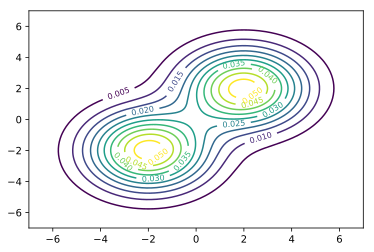

In [26]:
###单独画等高线
ax2=fig.add_subplot(111)
ax2.set_xlim([-6,6])
cs = plt.contour(xx,yy,zz, 10)  ###用ax2，有问题
ax2.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字
# cs2=ax.contour(xx,yy,zz2, 10)
# ax2.clabel(cs2, inline=1, fontsize=8)
plt.show()

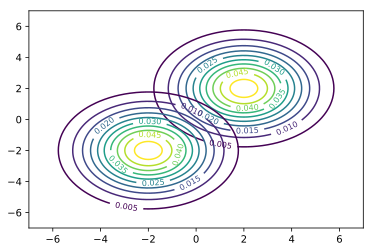

In [37]:
###单独画等高线2
ax2=fig.add_subplot(111)
ax2.set_xlim([-6,6])
cs = plt.contour(xx,yy,zz1, 10)  ###用ax2，有问题
ax2.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字
cs2=plt.contour(xx,yy,zz2, 10)
ax2.clabel(cs2, inline=1, fontsize=8)
plt.show()

# cs = plt.contour(xx,yy,zz1, 10)  ###用ax2，有问题
# cs.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字
# cs2=plt.contour(xx,yy,zz2, 10)
# cs2.clabel(cs2, inline=1, fontsize=8)
# plt.show()

In [28]:
#####################try
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
 
num = 200
n = np.linspace(-5,5,num)
X, Y =np.meshgrid(n, n) #X和Y各为n*n
pos = np.concatenate((np.expand_dims(X,axis=2),np.expand_dims(Y,axis=2)),axis=2)
 
u1 = np.array([2, 2])
o1 = 3*np.array([[1, 0],
              [0, 1]])
a1 = (pos-u1).dot(np.linalg.inv(o1))
b1 = np.expand_dims(pos-u1,axis=3)
Z1 = np.zeros((num,num), dtype=np.float32)
 
u2 = np.array([-2, -2])
o2 = 3*np.array([[1, 0],
              [0, 1]])
a2 = (pos-u2).dot(np.linalg.inv(o2))
b2 = np.expand_dims(pos-u2,axis=3)
Z2 = np.zeros((num,num), dtype=np.float32)

setsx=[]
for i in range(num):
    Z1[i] = [np.dot(a1[i,j],b1[i,j]) for j in range(num)]
    Z2[i] = [np.dot(a2[i,j],b2[i,j]) for j in range(num)]
#     if(Z1[i]==Z2[i]):
#         setsx.append()
        
Z1 = np.exp(Z1*(-0.5))/(2*np.pi*np.linalg.det(o1))
Z2 = np.exp(Z2*(-0.5))/(2*np.pi*np.linalg.det(o1))

 
Z = Z1 + Z2
 
fig = plt.figure()
ax = fig.add_subplot(211,projection='3d')
ax.plot_surface(X, Y, Z1, rstride=5, cstride=5, alpha=0.3, cmap=cm.coolwarm)
ax.plot_surface(X, Y, Z2, rstride=5, cstride=5, alpha=0.3, cmap=cm.coolwarm)

cset = ax.contour(X,Y,Z,10,zdir='z',offset=0,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-5,cmap=mpl.cm.winter)
cset = ax.contour(X, Y, Z, zdir='y', offset= 5,cmap= mpl.cm.winter)
'''
mpl.cm.rainbow
mpl.cm.winter
mpl.cm.bwr  # 蓝，白，红
cm.coolwarm
'''
 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# plt.show()
 
ax2 = fig.add_subplot(212)
cs = ax2.contour(X,Y,Z)
ax2.clabel(cs, inline=1, fontsize=8)
plt.show()

## 3.2.a (2) Draw the direction of the optimal choice vector w

## 3.2.b Draw the decision boundary through Log-odds

### 3.2.b.1 每个类的高斯分布矩阵Sa=Sb

138


Text(0.5,0,'Z')

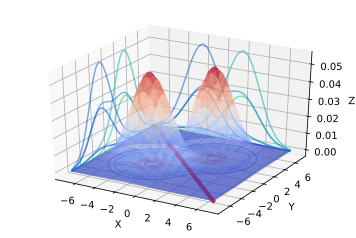

In [29]:
n=200
mins=-7 
maxs=7
x = np.linspace(mins,maxs,n)
y = np.linspace(mins,maxs,n)
xx,yy = np.meshgrid(x, y) ##生成网格数据
zz1 = np.zeros((n,n))
zz2 = np.zeros((n,n))
setsx=[]
setsy=[]
for i in range(n):
    for j in range(n):
        zz1[i][j] = gaussian(np.array([xx[i][j],yy[i][j]]),mean,cov)
        zz2[i][j] = gaussian(np.array([xx[i][j],yy[i][j]]),mean2,cov) ###cov2,决定了两个类的协方差矩阵(Sa,Sb)是否相等
        if(zz1[i][j]==zz2[i][j]):
            setsx.append(xx[i][j])
            setsy.append(yy[i][j])
print(len(setsx))
# print(len(setsy))
zz=zz1+zz2
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d') 
ax.plot_surface(xx, yy, zz1, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm) 
ax.plot_surface(xx, yy, zz2, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm) 
###绘制曲面，指定行和列的步幅，步幅决定曲面上“瓦片”的大小
cset = ax.contour(xx,yy,zz,10,zdir='z',offset=0,cmap=cm.coolwarm, alpha=0.5) #10表示按照高度分成10层，cmap表示渐变标准
#offset表示投影位置，offset=0表示投影在XOY平面
cset = ax.contour(xx, yy, zz, zdir='x', offset=mins,cmap=mpl.cm.winter, alpha=0.5)
#投影在YOZ平面上，左面那个平面上
cset = ax.contour(xx, yy, zz, zdir='y', offset= maxs,cmap= mpl.cm.winter,alpha=0.5)
# 投影在XOZ平面上，后面那个平面上

ax.scatter(setsx,setsy,marker='+',c='r')

# ax.set_zlim([0,0.3])   
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
            

In [42]:
print(11/4)
np.divide(11,4)

2.75


2.75

In [136]:
'''
x:2*1
miu1,miu2:2*1
cov1,cov2:2*2
'''
def fun_logOdds(x,miu1,miu2,cov1,cov2):
    log_odds_1=np.log(np.linalg.det(cov1)/np.linalg.det(cov2))
    mult=(x-miu1).T
#     print(mult.shape)
    mult1=mult.dot(cov1)
#     print(mult1.shape)
#     print(mult1.dot(x-miu1))
    mult2=(x-miu2).T
    mult22=mult2.dot(cov2)
    log_odds_2=0.5*mult1.dot(x-miu1)-0.5*mult22.dot(x-miu2)
    log_odds=log_odds_1+log_odds_2
#     print(log_odds_1)
#     print(log_odds_2)
    return log_odds

In [168]:
mean=(2,2)  #tuple
cov=[[3,0],[0,3]]
mean2=(-1,-1)
cov2=[[3,0],[0,3]]
miu1=np.array([mean]).T
print(miu1.shape)
print(miu1)
miu2=np.array([mean2]).T
print(miu2.shape)
print(miu2)
miu3=np.array([[-1,-1]]).T
print(miu3)
cov1=np.array(cov)
print(cov1.shape)
cov22=np.array(cov2)
print(cov22.shape)

(2, 1)
[[2]
 [2]]
(2, 1)
[[-1]
 [-1]]
[[-1]
 [-1]]
(2, 2)
(2, 2)


In [148]:
log_odds_x_list=[]
log_odds_x_list2=[]
for i in range(n):
    for j in range(n):
#         print(np.array([xx[i][j],yy[i][j]]).T.shape)
        x=np.array([[xx[i][j],yy[i][j]]]).T
#         print(x.shape)
      
        log_odds=fun_logOdds(x,miu1,miu2,cov1,cov1)
        if(log_odds>0):
            log_odds_x_list.append(x)
        elif(log_odds<0):
            log_odds_x_list2.append(x)
        if(i==0 and j==0):
            print(log_odds)

# x=np.array([[xx[0][0],yy[0][0]]]).T
# #         print(x.shape)
      
# log_odds=fun_logOdds(x,miu1,miu2,cov1,cov22)
# #         if(log_odds==0):
# #             log_odds_x_list.append(x)
# print(log_odds)
print(len(log_odds_x_list))
print(len(log_odds_x_list2))

[[168.]]
19948
19918


(200,)
(200,)
(2, 1)
[[1.06335692]
 [0.02775415]]
133
67
0
(133, 2, 1)


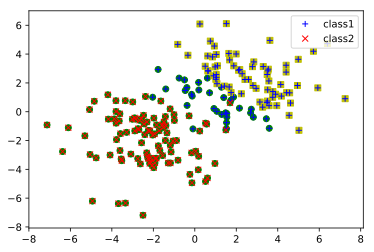

In [192]:
mean=(2,2)  #tuple
cov=[[3,0],[0,3]]
samples=np.random.multivariate_normal(mean, cov, sample_size)
plt.plot(samples[:, 0], samples[:, 1], '+',c='b',label='class1')

# mean2=(-1,-1)
mean2=(-2,-2)
cov2=[[3,0],[0,3]]
samples2=np.random.multivariate_normal(mean2, cov2, sample_size)
plt.plot(samples2[:, 0], samples2[:, 1], 'x',c='r',label='class2')
plt.legend(loc='upper right')

miu1=np.array([mean]).T
# print(miu1.shape)
# print(miu1)
miu2=np.array([mean2]).T
# print(miu2.shape)
# print(miu2)
miu3=np.array([[1,1]]).T
# print(miu3)
cov1=np.array(cov)
# print(cov1.shape)
cov22=np.array(cov2)
# print(cov22.shape)

log_odds_x_list=[]
log_odds_x_list2=[]
log_odds_x_list0=[]
x11=np.hstack((samples[:, 0], samples2[:, 0]))  #水平组合
# x11=np.atleast_1d(x11)
print(x11.shape)
x22=np.hstack((samples[:, 1], samples2[:, 1]))
print(x22.shape)
n=x11.shape[0]
print(np.array([[x11[0],x22[0]]]).T.shape)
threshold=0
for i in range(n):
    x=np.array([[x11[i],x22[i]]]).T  #2*1
    if(i==0):
        print(x)
    log_odds=fun_logOdds(x,miu1,miu3,cov1,cov22)
    if(log_odds>threshold):
        log_odds_x_list.append(x)
    elif(log_odds<-threshold):
        log_odds_x_list2.append(x)
    elif(np.abs(log_odds)<=threshold):
        log_odds_x_list0.append(x)
print(len(log_odds_x_list))
print(len(log_odds_x_list2)) 
print(len(log_odds_x_list0))
# print(log_odds_x_list)
log_odds_x=np.asarray(log_odds_x_list) 
log_odds_x2=np.asarray(log_odds_x_list2)
log_odds_x0=np.asarray(log_odds_x_list0)
print(log_odds_x.shape)
plt.scatter(log_odds_x[:,0],log_odds_x[:,1],c='g')  #point,green~log-odds>0
plt.scatter(log_odds_x2[:,0],log_odds_x2[:,1],marker='s',c='y')  # square,yellow~log-odds<0
if(len(log_odds_x_list0)>0):
    plt.scatter(log_odds_x0[:,0],log_odds_x0[:,1],marker='d',c='m')
plt.show()

### 3.2.b.2 每个类的高斯分布矩阵Sa<>Sb

(200,)
(200,)
(2, 1)
[[-1.39941393]
 [ 0.55541415]]
113
87
0
(113, 2, 1)


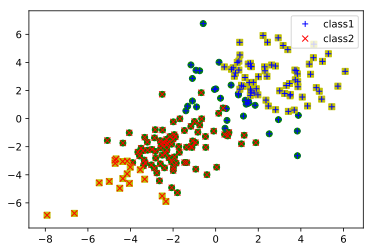

In [194]:
mean=(2,2)  #tuple
cov=[[3,0],[0,3]]
samples=np.random.multivariate_normal(mean, cov, sample_size)
plt.plot(samples[:, 0], samples[:, 1], '+',c='b',label='class1')

# mean2=(-1,-1)
mean2=(-2,-2)
cov2=[[3,1.5],[1.5,3]]
samples2=np.random.multivariate_normal(mean2, cov2, sample_size)
plt.plot(samples2[:, 0], samples2[:, 1], 'x',c='r',label='class2')
plt.legend(loc='upper right')

miu1=np.array([mean]).T
# print(miu1.shape)
# print(miu1)
miu2=np.array([mean2]).T
# print(miu2.shape)
# print(miu2)
miu3=np.array([[1,1]]).T
# print(miu3)
cov1=np.array(cov)
# print(cov1.shape)
cov22=np.array(cov2)
# print(cov22.shape)

log_odds_x_list=[]
log_odds_x_list2=[]
log_odds_x_list0=[]
x11=np.hstack((samples[:, 0], samples2[:, 0]))  #水平组合
# x11=np.atleast_1d(x11)
print(x11.shape)
x22=np.hstack((samples[:, 1], samples2[:, 1]))
print(x22.shape)
n=x11.shape[0]
print(np.array([[x11[0],x22[0]]]).T.shape)
threshold=0
for i in range(n):
    x=np.array([[x11[i],x22[i]]]).T  #2*1
    if(i==0):
        print(x)
    log_odds=fun_logOdds(x,miu1,miu3,cov1,cov22)
    if(log_odds>threshold):
        log_odds_x_list.append(x)
    elif(log_odds<-threshold):
        log_odds_x_list2.append(x)
    elif(np.abs(log_odds)<=threshold):
        log_odds_x_list0.append(x)
print(len(log_odds_x_list))
print(len(log_odds_x_list2)) 
print(len(log_odds_x_list0))
# print(log_odds_x_list)
log_odds_x=np.asarray(log_odds_x_list)
log_odds_x2=np.asarray(log_odds_x_list2)
log_odds_x0=np.asarray(log_odds_x_list0)
print(log_odds_x.shape)
plt.scatter(log_odds_x[:,0],log_odds_x[:,1],c='g')  #point,green~log-odds>0
plt.scatter(log_odds_x2[:,0],log_odds_x2[:,1],marker='s',c='y')  # square,yellow~log-odds<0
if(len(log_odds_x_list0)>0):
    plt.scatter(log_odds_x0[:,0],log_odds_x0[:,1],marker='d',c='m')
plt.show()

### 3.2.b.2 每个类的高斯分布矩阵Sa<>Sb

0
0
1.0870744101872072e-13
1.7075767938202823e-05
1.7075768046910263e-05
(200, 200)
40000
0


Text(0.5,0,'Z')

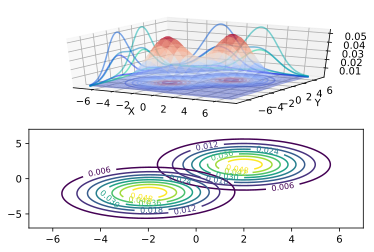

In [30]:
# mean2=(5,6)
# cov2=[[5,0],[0,5]]
# cov2=[[1,0],[0,7]]
# mean2=(-2,-2)
cov2=[[3,.1],[.1,3]]
n=200
mins=-7 
maxs=7
x = np.linspace(mins,maxs,n)
y = np.linspace(mins,maxs,n)
xx,yy = np.meshgrid(x, y) ##生成网格数据
zz1 = np.zeros((n,n))
zz2 = np.zeros((n,n))
setsx=[]
setsy=[]
for i in range(n):
    for j in range(n):
        zz1[i][j] = gaussian(np.array([xx[i][j],yy[i][j]]),mean,cov)
        zz2[i][j] = gaussian(np.array([xx[i][j],yy[i][j]]),mean2,cov2) ###cov2,决定了两个类的协方差矩阵(Sa,Sb)是否相等
        if(zz1[i][j]==zz2[i][j]):  
            setsx.append(xx[i][j])
            setsy.append(yy[i][j])
print(len(setsx))
print(len(setsy))

zz=zz1+zz2 #??????
print(zz1[0][0])
print(zz2[0][0])
print(zz[0][0])

# for i in range(n):
#     for j in range(n):
#         for k in range(n):
#             for m in range(n):
#                 if(zz1[i][j]==zz2[k][m]):  #不一定两个概率等值是取在同一个下标（是同一个下标，同一个点）
# #                     setsx.append(xx[i][j])
#                     setsx.append(xx[k][m])
#                     setsy.append(yy[k][m])
# print(len(setsx))
# print(len(setsy))

# 比较两个二维数组里有没有相同的值
print(zz1.shape)
zz11=zz1.flatten()
zz1_list=np.ndarray.tolist(zz11)
zz22=zz2.flatten()
zz2_list=np.ndarray.tolist(zz22)
print(len(zz1_list))
set_c=set(zz1_list) & set(zz2_list)
list_c=list(set_c)
print(len(list_c))


fig=plt.figure()
ax = fig.add_subplot(211,projection='3d') 
ax.plot_surface(xx, yy, zz, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm) 
###绘制曲面，指定行和列的步幅，步幅决定曲面上“瓦片”的大小
cset = ax.contour(xx,yy,zz,10,zdir='z',offset=0,cmap=cm.coolwarm, alpha=0.5) #10表示按照高度分成10层，cmap表示渐变标准
#offset表示投影位置，offset=0表示投影在XOY平面
cset = ax.contour(xx, yy, zz, zdir='x', offset=mins,cmap=mpl.cm.winter, alpha=0.5)
#投影在YOZ平面上，左面那个平面上
cset = ax.contour(xx, yy, zz, zdir='y', offset= maxs,cmap= mpl.cm.winter,alpha=0.5)
# 投影在XOZ平面上，后面那个平面上

##########画登高线看有没有交集########
ax2=fig.add_subplot(212)
cs = ax2.contour(xx,yy,zz1, 8)
ax2.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字

cs2=ax2.contour(xx,yy,zz2, 8)
ax2.clabel(cs2, inline=1, fontsize=8)

ax.scatter(setsx,setsy,marker='+',c='r')

# ax.set_zlim([0,0.3])   
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [31]:
####try
mylist=[]
for i in range(10):
    mylist.append(np.square(i+1))

print(len(mylist))
print(mylist)
####try

10
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


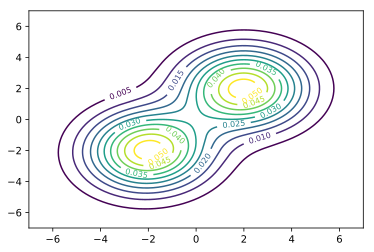

In [32]:
ax2=fig.add_subplot(111)
# ax2.set_xlim([-6,6])
cs = plt.contour(xx,yy,zz, 10)  ###用ax2，有问题
ax2.clabel(cs, inline=1, fontsize=8) #在等高线处添加数字
# cs2=ax.contour(xx,yy,zz2, 10)
# ax2.clabel(cs2, inline=1, fontsize=8)
plt.show()

### 3.2.c Unbalanced Fish Ratio

In [33]:
def unbalanced_fisher_ratio_func(x1,x2,wtheta):
    y1= func(wtheta,x1) 
    y2=func(wtheta,x2)
    mu1=np.mean(y1)
#     print(mu1)
    mu2=np.mean(y2)
    var1=np.var(y1)
# print(var1)
    var2=np.var(y2)
#     print(var2)
    fw_numerator=np.power(mu1-mu2,2)
#     print(fw_numerator)
    fw_denominator=var1+var2
#     print(fw_denominator)
    fw=fw_numerator/fw_denominator
    return fw

In [34]:
#################计算每个w对应的unbalanced fisher ratio##########################
fw1=unbalanced_fisher_ratio_func(x1,x2,w1)
print("fw1=",fw1)
fw2=unbalanced_fisher_ratio_func(x1,x2,w2)
print("fw2=",fw2)
fw3=unbalanced_fisher_ratio_func(x1,x2,w3)
print("fw3=",fw3)
fw4=unbalanced_fisher_ratio_func(x1,x2,w4)
print("fw4=",fw4)
fw5=unbalanced_fisher_ratio_func(x1,x2,w5)
print("fw5=",fw5)

fw1= 0.033710220269687285
fw2= 5.20824584585981
fw3= 1.8564471168172565
fw4= 1.8564471168172565
fw5= 3.280307578842999
